# Table of Contents
* [PDF parsing experiments](#PDF-parsing-experiments)
	* [pdfminer](#pdfminer)
	* [pdfminer drawing boxes](#pdfminer-drawing-boxes)
	* [Minecart + poppler direct](#Minecart-+-poppler-direct)
	* [tables of content extraction](#tables-of-content-extraction)
* [Image extraction](#Image-extraction)
* [CK12 flexbook pdf extraction](#CK12-flexbook-pdf-extraction)
	* [freq distribution](#freq-distribution)
	* [performing extraction](#performing-extraction)


In [1]:
%%capture
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict, OrderedDict
%load_ext autoreload
%autoreload 2

import cv2
import pprint
import pickle
import json
import requests
import io
import sys
import os
from binascii import b2a_hex
import base64
from wand.image import Image as WImage
from IPython.display import display
import PIL.Image as Image
from copy import deepcopy

from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams, LTTextBox, LTTextLine, LTFigure, LTImage

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pdfextraction.ck12_flex_extract as ck_ex

# PDF parsing experiments

## pdfminer

In [440]:
page_size = []
with open(test_file, 'r') as fp:
    parser = PDFParser(fp)
    document = PDFDocument(parser)
    
    for page_n, page in enumerate(PDFPage.create_pages(document)):
        page_size = page.mediabox[2:]

In [5]:
test_page_layout[0]._objs

[<LTTextBoxHorizontal(0) 54.000,761.451,117.927,775.272 u'www.ck12.org\n'>,
 <LTTextBoxHorizontal(1) 436.386,761.451,555.273,775.272 u'Chapter 4. Cell Functions\n'>,
 <LTTextBoxHorizontal(2) 98.382,694.737,236.200,725.331 u'4.1 Transport\n'>,
 <LTTextBoxHorizontal(3) 54.000,610.841,168.099,627.859 u'Lesson Objectives\n'>,
 <LTTextBoxHorizontal(4) 72.000,557.794,278.073,598.714 u'\u2022 Describe the structure of the cell membrane.\n\u2022 Identify ways that passive transport occurs.\n\u2022 De\ufb01ne and give examples of active transport.\n'>,
 <LTTextBoxHorizontal(5) 54.000,496.318,171.107,513.336 u'Lesson Vocabulary\n'>,
 <LTTextBoxHorizontal(6) 72.000,348.427,166.636,484.191 u'\u2022 active transport\n\u2022 concentration\n\u2022 diffusion\n\u2022 facilitated diffusion\n\u2022 osmosis\n\u2022 passive transport\n\u2022 simple diffusion\n\u2022 transport\n\u2022 transport protein\n\u2022 vesicle transport\n'>,
 <LTTextBoxHorizontal(7) 54.000,286.951,129.055,303.969 u'Introduction\n'>,

In [13]:
test_page_layout[0]._objs[-4]

{'bbox': (54.0, 723.20454, 558.0065, 723.20454),
 'height': 0.0,
 'linewidth': 1.99255,
 'pts': [(54.0, 723.20454), (558.0065, 723.20454)],
 'width': 504.00649999999996,
 'x0': 54.0,
 'x1': 558.0065,
 'y0': 723.20454,
 'y1': 723.20454}

In [7]:
test_char_ext = test_page_layout[0]._objs[0]._objs[0]._objs[0]

In [17]:
test_char_ext.fontsize.__dict__

{'ascent': 924,
 'basefont': 'XCRUNF+NimbusRomNo9L-Regu',
 'bbox': [-199, -312, 1031, 955],
 'cid2unicode': {32: u' ',
  33: u'!',
  34: u'"',
  35: u'#',
  36: u'$',
  37: u'%',
  38: u'&',
  39: u"'",
  40: u'(',
  41: u')',
  42: u'*',
  43: u'+',
  44: u',',
  45: u'-',
  46: u'.',
  47: u'/',
  48: u'0',
  49: u'1',
  50: u'2',
  51: u'3',
  52: u'4',
  53: u'5',
  54: u'6',
  55: u'7',
  56: u'8',
  57: u'9',
  58: u':',
  59: u';',
  60: u'<',
  61: u'=',
  62: u'>',
  63: u'?',
  64: u'@',
  65: u'A',
  66: u'B',
  67: u'C',
  68: u'D',
  69: u'E',
  70: u'F',
  71: u'G',
  72: u'H',
  73: u'I',
  74: u'J',
  75: u'K',
  76: u'L',
  77: u'M',
  78: u'N',
  79: u'O',
  80: u'P',
  81: u'Q',
  82: u'R',
  83: u'S',
  84: u'T',
  85: u'U',
  86: u'V',
  87: u'W',
  88: u'X',
  89: u'Y',
  90: u'Z',
  91: u'[',
  92: u'\\',
  93: u']',
  94: u'^',
  95: u'_',
  96: u'`',
  97: u'a',
  98: u'b',
  99: u'c',
  100: u'd',
  101: u'e',
  102: u'f',
  103: u'g',
  104: u'h',
  105: u'i'

In [12]:
dir(test_char_ext.fontsize)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ascent',
 'basefont',
 'bbox',
 'char_disp',
 'char_width',
 'cid2unicode',
 'decode',
 'default_width',
 'descent',
 'descriptor',
 'flags',
 'fontname',
 'get_ascent',
 'get_descent',
 'get_height',
 'get_width',
 'hscale',
 'is_multibyte',
 'is_vertical',
 'italic_angle',
 'leading',
 'string_width',
 'to_unichr',
 'unicode_map',
 'vscale',
 'widths']

In [277]:
def get_deepest_nested_component(layout_comp):
    if hasattr(layout_comp, '_objs'):
        return get_first_nested_component(layout_comp._objs[0])
    else:
        return layout_comp

def check_for_topic_header(text_box, header_font):
    first_char = get_deepest_nested_component(text_box)
    if hasattr(first_char, 'fontname'):
        box_font = first_char.fontname.split('_')[-1]
        print box_font
        return box_font == header_font
    else:
        return False

def process_line(text_box):
    return check_for_topic_header(text_box)

def process_page(page_layout, header_font = 'Bold'):
    for box in page_layout:
        print box
        header_found = check_for_topic_header(box, header_font)

In [14]:
# test_page_layout[0]._objs


'KCJNMV+NimbusRomNo9L-Regu-Slant_167'

to1 = test_page_layout[0]._objs[2]._objs[0]._objs[0]

## pdfminer drawing boxes

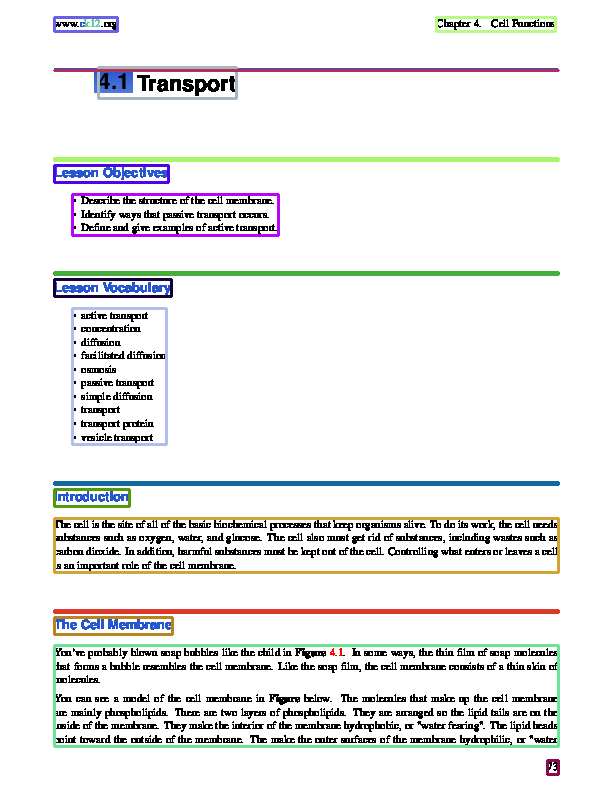

In [4]:
# pdf_processing.draw_pdf_with_boxes(test_file, [50,50])
pdf_processing.draw_pdf_with_boxes(test_file, [0,1])

## Minecart + poppler direct

In [20]:
import minecart

In [28]:
ROW_BORDERS = (
    72 * 1,  # Bottom row starts 1 inch from the bottom of the page
    72 * 3,  # Second row starts 3 inches from the bottom of the page
    72 * 5,  # Third row starts 5 inches from the bottom of the page
    72 * 7,  # Third row ends 7 inches from the bottom of the page
)
COLUMN_BORDERS = (
    72 * 8,  # Third col ends 8 inches from the left of the page
    72 * 6,  # Third col starts 6 inches from the left of the page
    72 * 4,  # Second col starts 4 inches from the left of the page   
    72 * 2,  # First col starts 2 inches from the left of the page
)  # reversed so that BOXES is ordered properly
BOXES = [
    (left, bot, right, top)
    for top, bot in zip(ROW_BORDERS, ROW_BORDERS[1:])
    for left, right in zip(COLUMN_BORDERS, COLUMN_BORDERS[1:])
]

def extract_output(page):
    """
    Reads the text from page and splits it into the 9 cells.

    Returns a list with 9 entries: 

        [A, B, C, D, E, F, G, H, I]

    Each item in the tuple contains a string with all of the
    text found in the cell.

    """
    res = []
    for box in BOXES:
        strings = list(page.letterings.iter_in_bbox(box))
        # We sort from top-to-bottom and then from left-to-right, based
        # on the strings' top left corner
        strings.sort(key=lambda x: (-x.bbox[3], x.bbox[0]))
        res.append(" ".join(strings).replace(u"\xa0", " ").strip())
    return res

In [24]:
content = []
doc = minecart.Document(open(test_file, 'rb'))

In [9]:
# for page in doc.iter_pages():
#     content.append(extract_output(page))

In [37]:
import poppler

ImportError: No module named poppler

In [33]:
import ctypes
import sys
import os.path
import poppler_page
lib_poppler = ctypes.cdll.LoadLibrary("/usr/local/Cellar/poppler/0.37.0/lib/libpoppler-glib.8.dylib")
 
ctypes.pythonapi.PyCapsule_GetPointer.restype = ctypes.c_void_p
ctypes.pythonapi.PyCapsule_GetPointer.argtypes = [ctypes.py_object, ctypes.c_char_p]
PyCapsule_GetPointer = ctypes.pythonapi.PyCapsule_GetPointer
 
class Poppler_Rectangle(ctypes.Structure):
    _fields_ = [ ("x1", ctypes.c_double), ("y1", ctypes.c_double), ("x2", ctypes.c_double), ("y2", ctypes.c_double) ]
LP_Poppler_Rectangle = ctypes.POINTER(Poppler_Rectangle)
poppler_page_get_text_layout = ctypes.CFUNCTYPE(ctypes.c_int, 
                                                ctypes.c_void_p, 
                                                ctypes.POINTER(LP_Poppler_Rectangle), 
                                                ctypes.POINTER(ctypes.c_uint)
                                                )(lib_poppler.poppler_page_get_text_layout)
 
def get_page_layout(page):
    assert isinstance(page, Poppler.Page)
    capsule = page.__gpointer__
    page_addr = PyCapsule_GetPointer(capsule, None)
    rectangles = LP_Poppler_Rectangle()
    n_rectangles = ctypes.c_uint(0)
    has_text = poppler_page_get_text_layout(page_addr, ctypes.byref(rectangles), ctypes.byref(n_rectangles))
    try:
        result = []
        if has_text:
            assert n_rectangles.value > 0, "n_rectangles.value > 0: {}".format(n_rectangles.value)
            assert rectangles, "rectangles: {}".format(rectangles)
            for i in range(n_rectangles.value):
                r = rectangles[i]
                result.append((r.x1, r.y1, r.x2, r.y2))
        return result
    finally:
        if rectangles:
            GLib.free(ctypes.addressof(rectangles.contents))
 
def main():
    
    print 'Version:', Poppler.get_version()
    path= test_file
    if not os.path.isabs(path):
        path=os.path.join(os.getcwd(), path)
    d=Poppler.Document.new_from_file('file:'+path)
    n=d.get_n_pages()
    for pg_no in range(n):
        p=d.get_page(pg_no)
        print 'Page %d' % (pg_no+1), 'size ', p.get_size()
        text=p.get_text().decode('UTF-8')
        locs=get_page_layout(p)
        fonts=p.get_text_attributes()
        offset=0
        cfont=0
        for line in text.splitlines(True):
            print ' ', line.encode('UTF-8'),
            n=len(line)
            for i in range(n):
                if line[i]==u'\n':
                    continue
                font=fonts[cfont]
                while font.start_index > i+offset or font.end_index < i+offset:
                    cfont+=1
                    if cfont>= len(fonts):
                        font=None
                        break
                    font=fonts[cfont]
                
                bb=locs[offset+i]
                print line[i].encode('UTF-8'), '(%0.2f, %0.2f, %0.2f, %0.2f)' % bb,
                if font:
                    print font.font_name, font.font_size, 'r=%d g=%d, b=%d'%(font.color.red, font.color.green, font.color.blue),
            offset+=n
            print       
        print
        #p.free_text_attributes(fonts)

## tables of content extraction

In [34]:
import pdfparser.poppler as pdf
import sys
import string

In [ ]:
# test_file = text_path + earth_sci_text
# test_file = text_path + life_sci_text
# test_file = 'img_test/test_page.pdf'
# test_file = './ck12_pdfs/text/test_page_multi.pdf'

# toc_dir = 'tables_of_content/'
# etoc = 'ls_toc.pdf'
# test_file = text_path + toc_dir + etoc

In [169]:
d=pdf.Document(test_file)
etoc_lines =[]
print 'No of pages', d.no_of_pages
for p in d:
#     print 'Page', p.page_no, 'size =', p.size
    for f in p:
#         print ' '*1,'Flow'
        for b in f:
#             print ' '*2,'Block', 'bbox=', b.bbox.as_tuple()
            for l in b:
#                 print ' '*3, l.text.encode('UTF-8'), '(%0.2f, %0.2f, %0.2f, %0.2f)'% l.bbox.as_tuple()
                #assert l.char_fonts.comp_ratio < 1.0
#                 print list(l.char_fonts)[0]
#                 for i in range(len(l.text)):
#                     print l.text[i].encode('UTF-8'), '(%0.2f, %0.2f, %0.2f, %0.2f)'% l.char_bboxes[i].as_tuple(),\
#                         print'(%0.2f, %0.2f, %0.2f, %0.2f)'% , \
#                 print l.text
#                 print l.char_fonts[0].size, l.char_fonts[0].color
                if l.char_fonts[0].color.as_tuple()[2] == 1.0:
                    line_text = l.text
                    if not line_text[0].isdigit():
                        line_text = line_text.replace('.','')

                    etoc_lines.append(line_text.strip().encode('ascii', 'ignore'))
#                         l.char_fonts[i].name, l.char_fonts[i].size, l.char_fonts[i].color,
#                     print '\n'
#                 print

No of pages 4


In [170]:
processed_lines = []
for idx, t_line in enumerate(etoc_lines):
    start_char = t_line[0]
    if not start_char.isdigit() and '.' in etoc_lines[idx - 1] and 'References' not in t_line and len(t_line) > 2:
        new_line = etoc_lines[idx - 1] + ' ' + t_line
        while new_line[-1].isdigit():
            new_line = new_line[:-1]
        processed_lines.append(new_line[:].strip())

In [173]:
# etoc_lines

In [72]:
pd.Series(processed_lines).to_csv('phys_sci_toc.csv', index=False)

In [212]:
for lesson, topic in parsed_flexbook.items():
    if not lesson.encode('ascii', 'ignore') in ls_toc_list:
        print lesson

In [185]:
ls_toc = pd.read_csv('./parsed_to`c/life_sci_toc.csv', header=None)
ls_toc_list = ls_toc.values.flatten().tolist()

# Image extraction

In [553]:
image_bbox = []
for ob in fig_page_layout:
    if isinstance(ob, LTFigure):
        image_bbox.append(ob.bbox)

In [560]:
tl1 = fig_page_layout[18]

In [555]:
fig_page_layout

[<LTTextBoxHorizontal(0) 54.000,761.451,101.935,775.294 u'9.2. Fungi\n'>,
 <LTTextBoxHorizontal(1) 491.346,761.451,555.273,775.272 u'www.ck12.org\n'>,
 <LTTextBoxHorizontal(2) 392.302,648.366,553.740,676.526 u'FIGURE 9.10\nSexual and asexual reproduction in fungi\n'>,
 <LTTextBoxHorizontal(3) 53.999,476.645,557.999,518.220 u'Yeasts are an exception. They reproduce asexually by budding instead of by producing spores. An offspring cell\nforms on a parent cell. After it grows and develops, it buds off to form a new cell. The offspring cell is genetically\nidentical to the parent cell. You can see yeast cells budding in Figure 9.11.\n'>,
 <LTTextBoxHorizontal(4) 392.302,374.991,468.614,402.946 u'FIGURE 9.11\nYeast cells budding\n'>,
 <LTTextBoxHorizontal(5) 53.999,218.036,206.075,232.217 u'Sexual Reproduction in Fungi\n'>,
 <LTTextBoxHorizontal(6) 53.999,163.810,557.999,204.730 u'Sexual reproduction also occurs in most fungi. It happens when two haploid hyphae mate. During mating, two\nhap

In [668]:
image_bbox

[(54.0, 565.05, 342.0, 732.0899999999999),
 (53.999, 298.883, 342.02660000000003, 451.30229999999995)]

In [443]:
page_size[1]/float(page_size[0])

1.2941176470588236

In [445]:
page_size

[612, 792]

In [456]:
image_bbox

[(54.0, 565.05, 342.0, 732.0899999999999),
 (53.999, 298.883, 342.02660000000003, 451.30229999999995)]

In [455]:
image_bbox[0]

(54.0, 565.05, 342.0, 732.0899999999999)

In [464]:
scale_factor = float(ti1.size[0]) / page_size[0]  

In [465]:
scale_factor

2.0833333333333335

In [397]:
# img_file= '/Users/schwenk/wrk/notebooks/stb/img_test/test_dir/Im190.png'
img_file= '/Users/schwenk/wrk/notebooks/stb/img_ext_test.png'

In [448]:
ti1 = Image.open(img_file)

In [604]:
ti1.size

(1275, 1650)

In [472]:
image_bbox

[(54.0, 565.05, 342.0, 732.0899999999999),
 (53.999, 298.883, 342.02660000000003, 451.30229999999995)]

Fortunately, though, each object also provides a bbox (bounding box) attribute, which is a four-part tuple of the object's page position: (x0, y0, x1, y1).

In [630]:
# box = (x_offset, Y_offset, width, height)
box = image_bbox[0]
scaled_box = [co * scale_factor for co in box]
print scaled_box
temp = ti1.size[1] - scaled_box[3]
scaled_box[3] = ti1.size[1] - scaled_box[1]
scaled_box[1] = temp
print scaled_box
crop = ti1.crop([112, 124.8125, 712.5, 472.8125])
# crop = ti1.crop(scaled_box)
# crop.save(image_path, format)

[112.50000000000001, 1177.1875, 712.5, 1525.1875]
[112.50000000000001, 124.8125, 712.5, 472.8125]


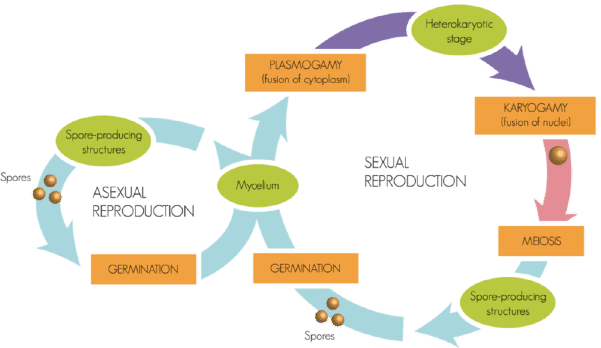

In [626]:
crop

# CK12 flexbook pdf extraction

## freq distribution

relies on code below having been run

In [ ]:
life_sci_corpus = ''
for topic, lesson in parsed_flexbook.items():
    for lesson_title, content in lesson.items():
        life_sci_corpus += content['text'][0]

lsc_freq_d = nltk.FreqDist(word_tokenize(life_sci_corpus))
# lsc_freq_d.most_common()

## performing extraction

In [1898]:
flexbooks = {
#     'ls': 'CK-12-Life-Science-For-Middle-School_b_v77_dzc_s1.pdf',
    'es': 'CK-12-Earth-Science-For-Middle-School_b_v39_yq9_s1.pdf',
#     'ps': 'CK-12-Physical-Science-For-Middle-School_b_v45_cmw_s1.pdf'
}

textbook_path = '../ck12/flexbooks/raw-pdfs/text/'
figure_ext_path = '../flexbook_image_extraction/'
rasterized_pages_dir = figure_ext_path +  'pdf_pages/' 
figure_dest_dir = figure_ext_path + 'figures/'

In [ ]:
page_range_df = pd.read_csv(textbook_path + 'supplementary/page_ranges.csv', header=None)
range_array = page_range_df.to_dict(orient='split')['data']
range_lookup = {k[0]: k[1:]  for k in range_array}

In [1899]:
parsed_flexbooks = {}
for subject, flexbook_to_parse in flexbooks.items():
    pdf_path = textbook_path + flexbook_to_parse
    parser = ck_ex.TextbookParser(os.path.join(rasterized_pages_dir, 'single_page_images', subject, ''), os.path.join(figure_dest_dir, subject, ''))
    parsed_flexbooks[subject] = parser.parse_pdf(pdf_path, range_lookup[flexbook_to_parse])
#     parsed_flexbooks[subject] = parser.parse_pdf(pdf_path, [5,20])

# Workbook extraction

In [1908]:
workbooks = {
#     'ls': 'CK-12 Life Science For Middle School Workbook (With Answers) 06.01.15.pdf',
    'es': 'CK-12-Earth-Science-For-Middle-School-Workbook-with-Answers.pdf',
#     'ps': 'CK-12-Physical-Science-For-Middle-School-Workbook-with-Answers.pdf'    
}
workbook_path = '../ck12/flexbooks/raw-pdfs/questions/'

# ends at preview page num -1
# begins at preview page num -2

workbook_q_ranges = {
    'ls': [7, 291],
    'ps': [7, 317],
    'es': [7, 369]
#       'ps': [7, 9],
#     'ls': [201, 204]
}
workbook_ans_ranges = {
    'ls': [291, 415],
    'ps': [317, 435],
    'es': [370, 506]

#     'ps': [317, 318],

#     'ls': [375, 377]
} 

In [1909]:
%%time
# %%snakeviz
parsed_workbooks = {}
for subject, workbook_to_parse in workbooks.items():
    pdf_path = workbook_path + workbook_to_parse
    wb_parser = ck_ex.WorkbookParser()
#     parsed_workbooks['questions'], parsed_workbooks['answers'] = wb_parser.parse_worksheet_pdf(pdf_path, workbook_q_ranges[subject], workbook_ans_ranges[subject])
    parsed_workbooks[subject] = wb_parser.parse_worksheet_pdf(pdf_path, workbook_q_ranges[subject], workbook_ans_ranges[subject])

CPU times: user 59.4 s, sys: 877 ms, total: 1min
Wall time: 1min


In [1912]:
sorted(parsed_workbooks['es'].keys())

['1.1 The Nature of Science',
 '1.2 Earth Science and Its Branches',
 '10.1 Erosion and Deposition by Flowing Water',
 '10.2 Erosion and Deposition by Waves',
 '10.3 Erosion and Deposition by Wind',
 '10.4 Erosion and Deposition by Glaciers',
 '10.5 Erosion and Deposition by Gravity',
 '11.1 Fossils',
 '11.2 Relative Ages of Rock',
 '11.3 Absolute Ages of Rocks',
 '12.1 The Origin of Earth',
 '12.2 Early Earth',
 '12.3 History of Earths Life Forms',
 '13.1 Water on Earth',
 '13.2 Surface Water',
 '13.3 Groundwater',
 '14.1 Introduction to the Oceans',
 '14.2 Ocean Movements',
 '14.3 The Ocean Floor',
 '14.4 Ocean Life',
 '15.1 The Atmosphere',
 '15.2 Energy in the Atmosphere',
 '15.3 Layers of the Atmosphere',
 '15.4 Air Movement',
 '16.1 Weather and Water in the Atmosphere',
 '16.2 Changing Weather',
 '16.3 Storms',
 '16.4 Weather Forecasting',
 '17.1 Climate and Its Causes',
 '17.2 World Climates',
 '17.3 Climate Change',
 '18.1 Ecosystems',
 '18.2 Cycles of Matter',
 '18.3 The Human

# Joining flexbook and workbooks

In [1778]:
# ls_flexbook = deepcopy(parsed_flexbooks['ls'])
# ls_workbook = deepcopy(parsed_workbooks['ls'])

In [1785]:
pwbk = parsed_workbooks['ps'].keys()

In [1786]:
pfbk = parsed_flexbooks['ps'].keys()

In [1895]:
# parsed_workbooks['ps']['8.4 Lesson 8.4 Chemical Reactions and En']

In [1859]:
ps_flexbook = deepcopy(parsed_flexbooks['ps'])
ps_workbook = deepcopy(parsed_workbooks['ps'])

In [1915]:
es_flexbook = deepcopy(parsed_flexbooks['es'])
es_workbook = deepcopy(parsed_workbooks['es'])

In [1916]:
ds_assembler = ck_ex.CK12DataSetAssembler()
# joined_ls_flexbook = ds_assembler.join_content_and_questions(ls_flexbook, ls_workbook)
joined_es_flexbook = ds_assembler.join_content_and_questions(es_flexbook, es_workbook)

topic mismatch, attempting to match keys: set(['11.2 Relative Ages of Rocks', '5.2 Nonrenewable Energy Resources', '5.3 Renewable Energy Resources', '22.2 Effects of Air Pollution'])
by number


In [1401]:
with open('life_sciparsed_content.json', 'w') as f:
    json.dump(joined_flexbook, f, indent=4, sort_keys=True)

In [1861]:
with open('phys_sci_parsed_content.json', 'w') as f:
    json.dump(joined_ps_flexbook, f, indent=4, sort_keys=True)

In [1917]:
with open('earth_sci_parsed_content.json', 'w') as f:
    json.dump(joined_es_flexbook, f, indent=4, sort_keys=True)

In [1850]:
joined_flexbook = joined_ps_flexbook
small_test = {k: v for k,v in joined_flexbook.items()}
smt = json.loads(json.dumps(small_test))

## Dataset verification

In [1393]:
import jsonschema
from pdfextraction import ck12_schema

In [1891]:
ds_assembler = ck_ex.CK12DataSetAssembler()
ds_assembler.validate_schema(smt)

'correctAnswer' is a required property


8th MC question missing an answer

In [1896]:
smt['11.2 Radioactive Decay']['questions']['nonDiagramQuestions']['q15']

{u'answerChoices': {u'a': {u'idStructural': u'a.',
   u'processedText': u'208 Po',
   u'rawText': u'a. 208 Po'},
  u'b': {u'idStructural': u'b.',
   u'processedText': u'131 I  130 Xe + 0 e + Energy',
   u'rawText': u'b. 131 I  130 Xe + 0 e + Energy'},
  u'c': {u'idStructural': u'c.', u'processedText': u'1', u'rawText': u'c. 1'},
  u'd': {u'idStructural': u'd.',
   u'processedText': u'53',
   u'rawText': u'd. 53'}},
 u'beingAsked': {u'processedText': u'Which of the following nuclear equations is balanced?',
  u'rawText': u'8. Which of the following nuclear equations is balanced?'},
 u'id': u'q15',
 u'idStructural': u'8. ',
 u'type': u'Multiple Choice'}

In [1897]:
# validator.validate(smt, ck12_schema.ck12_schema)

# modules and quizes

In [2017]:
with open('../data/parsed_data_json/parsed_quiz_questions_new.json') as f:
    parsed_quizes = json.load(f)

In [2026]:
lessons_path = '/Users/schwenk/wrk/stb/ck12/lessons/'
es_dir ='earth-science/'
ls_dir ='life-science/'


figure_ext_path = '../flexbook_image_extraction/'
rasterized_pages_dir = figure_ext_path +  'lesson_pages/' 

pdf_name = 'Mercury-Pollution-HS-ES.pdf'
ck_12_lessons = {
    'es': pdf_name
}

In [1982]:
lesson_range = [1, 10]

In [2028]:
# parsed_lessons = {}
# parsed_lessons_es = parsed_lessons
parsed_lessons_ls ={}

In [2030]:
s_dir = ls_dir
for pdf_name in os.listdir(lessons_path + s_dir):
    lesson_name = pdf_name.replace('.pdf', '')
    print lesson_name
    pdf_path = lessons_path + s_dir + pdf_name
    parser = ck_ex.LessonParser(os.path.join(rasterized_pages_dir, 'single_page_images', subject, ''), os.path.join(figure_dest_dir, subject, ''))
    parsed_lessons_ls[lesson_name] = parser.parse_pdf(pdf_path, lesson_range)

Active-Transport-MS-LS
Adulthood-and-Aging-MS-LS
Alligators-and-Crocodiles-MS-LS
Amphibians-MS-LS
Angiosperms-MS-LS
Animal-Behaviors-MS-LS
Animal-Communication-MS-LS
Animal-like-Protists-MS-LS
Aquatic-Biomes-MS-LS
Arachnids-MS-LS
Archaea-MS-LS
Arthropods-MS-LS
Asexual-vs.-Sexual-Reproduction-MS-LS
Autoimmune-Diseases-MS-LS
B-and-T-Cell-Response-MS-LS
Bacteria-Characteristics-MS-LS
Bacteria-in-the-Digestive-System-MS-LS
Bacteria-Nutrition-MS-LS
Bacteria-Reproduction-MS-LS
Barriers-to-Pathogens-MS-LS
Basic-and-Applied-Science-MS-LS
Biotechnology-in-Agriculture-MS-LS
Bird-Reproduction-MS-LS
Birds-MS-LS
Blood-Diseases-MS-LS
Blood-Pressure-MS-LS
Blood-Types-MS-LS
Blood-Vessels-MS-LS
Bony-Fish-MS-LS
Cancer-MS-LS
Carbon-Cycle-Basic
Cardiovascular-Diseases-MS-LS
Cardiovascular-System-Health-MS-LS
Cardiovascular-System-MS-LS
Cartilaginous-Fish-MS-LS
Cell-Biology-MS-LS
Cell-Cycle-MS-LS
Cell-Division-MS-LS
Cell-Membrane-MS-LS
Cell-Nucleus-MS-LS
Cell-Transport-MS-LS
Cellular-Respiration-MS-LS
Cent

In [2038]:
tl1 = [1,2,3,4]

In [2050]:
with open('earth_sci_lessons.json', 'w') as f:
    json.dump(parsed_lessons, f, indent=4, sort_keys=True)

In [2052]:
def normalize_keys(parsed_lessons):
    normalized_lessons = deepcopy(parsed_lessons)
    for k in normalized_lessons.keys():
        if k[-1] == 'S':
            norm_k = k[:-6]
            norm_k = norm_k.replace('-', ' ').lower()
            print norm_kdd
#         normalized_lessons[k] = normalized_lessons[k].pop()
    

In [2053]:
normalize_keys(parsed_lessons_ls)

keeping skin healthy
fungi classification
muscles and exercise
helpful bacteria
cellular respiration
cancer
male reproductive structures
kidneys
evolution acts on the phenotype
fermentation
mitosis and cytokinesis
sex linked inheritance
health of the digestive system
food and nutrients
passive transport
fish
viruses
learned behavior of animals
what are biomes
nonvascular plants
importance of protists
nails and hair
barriers to pathogens
microscopes
aquatic biomes
gymnosperms
blood diseases
competition
arachnids
vascular seedless plants
modern genetics
diversity of birds
frogs and toads
fields in the life sciences
fungi reproduction
centipedes and millipedes
outdoor air pollution
succession
bacteria in the digestive system
organic compounds
male reproductive system
cell biology
sources of water pollution
fungi structure
fungus like protists
plant reproduction and life cycle
scientific ways of thinking
chromosomal disorders
safety in the life sciences
organization of the human body
theor

In [2047]:
sorted(parsed_lessons_ls.keys())

['Active-Transport-MS-LS',
 'Adulthood-and-Aging-MS-LS',
 'Alligators-and-Crocodiles-MS-LS',
 'Amphibians-MS-LS',
 'Angiosperms-MS-LS',
 'Animal-Behaviors-MS-LS',
 'Animal-Communication-MS-LS',
 'Animal-like-Protists-MS-LS',
 'Aquatic-Biomes-MS-LS',
 'Arachnids-MS-LS',
 'Archaea-MS-LS',
 'Arthropods-MS-LS',
 'Asexual-vs.-Sexual-Reproduction-MS-LS',
 'Autoimmune-Diseases-MS-LS',
 'B-and-T-Cell-Response-MS-LS',
 'Bacteria-Characteristics-MS-LS',
 'Bacteria-Nutrition-MS-LS',
 'Bacteria-Reproduction-MS-LS',
 'Bacteria-in-the-Digestive-System-MS-LS',
 'Barriers-to-Pathogens-MS-LS',
 'Basic-and-Applied-Science-MS-LS',
 'Biotechnology-in-Agriculture-MS-LS',
 'Bird-Reproduction-MS-LS',
 'Birds-MS-LS',
 'Blood-Diseases-MS-LS',
 'Blood-Pressure-MS-LS',
 'Blood-Types-MS-LS',
 'Blood-Vessels-MS-LS',
 'Bony-Fish-MS-LS',
 'Cancer-MS-LS',
 'Carbon-Cycle-Basic',
 'Cardiovascular-Diseases-MS-LS',
 'Cardiovascular-System-Health-MS-LS',
 'Cardiovascular-System-MS-LS',
 'Cartilaginous-Fish-MS-LS',
 'Cell-

In [2036]:
sorted(parsed_quizes.keys())

[u'active transport',
 u'adulthood and aging',
 u'alligators and crocodiles',
 u'amphibians',
 u'angiosperms',
 u'animal behaviors',
 u'animal communication',
 u'animallike protists',
 u'aquatic biomes',
 u'arachnids',
 u'archaea',
 u'arthropods',
 u'asexual vs. sexual reproduction',
 u'autoimmune diseases',
 u'b and t cell response',
 u'bacteria characteristics',
 u'bacteria in the digestive system',
 u'bacteria nutrition',
 u'bacteria reproduction',
 u'barriers to pathogens',
 u'basic and applied science',
 u'biotechnology in agriculture',
 u'bird reproduction',
 u'birds',
 u'blood diseases',
 u'blood pressure',
 u'blood types',
 u'blood vessels',
 u'bony fish',
 u'cancer',
 u'cardiovascular diseases',
 u'cardiovascular system',
 u'cardiovascular system health',
 u'cartilaginous fish',
 u'cell biology',
 u'cell cycle',
 u'cell division',
 u'cell membrane',
 u'cell nucleus',
 u'cell transport',
 u'cellular respiration',
 u'centipedes and millipedes',
 u'central nervous system',
 u'cha

# Lower grade levels

In [62]:
textbook_path = '../data/lower_grade_flexbooks/'
rasterized_pages_dir = textbook_path + 'single_page_images/'
lower_grade_books = {
    '5th': 'CK-12-Fifth-Grade-Science_b_v8_cpx_s1.pdf',
#     '1st': 'CK-12-First-Grade-Science_b_v13_khz_s1.pdf',
    '4th': 'CK-12-Fourth-Grade-Science_b_v4_jyz_s1.pdf',
#     '2nd': 'CK-12-Second-Grade-Science_b_v9_zpx_s1.pdf',
    '3rd': 'CK-12-Third-Grade-Science_b_v31_kov_s1.pdf'
}

In [63]:
parsed_lower_grades = {}
for grade, flexbook_to_parse in lower_grade_books.items():
    pdf_path = textbook_path + flexbook_to_parse
    gs_parser = ck_ex.GradeSchoolFlexbookParser(os.path.join(rasterized_pages_dir, 'single_page_images', grade, ''), 'extracted_figs/')
    parsed_lower_grades[grade] = gs_parser.parse_pdf(pdf_path, [4,200])

In [1834]:
parsed_lower_grades['3rd'].keys()

['1.5 Static Electricity',
 '2.2 World Climates',
 '3.2 Insect Reproduction and Life Cycles',
 '1.2 Friction',
 '2.3 Fossils of Plants and Animals',
 '3.1 Adaptation and Natural Selection',
 '1.1 Forces',
 '1.4 Magnets',
 '3.4 Plant Reproduction and Life Cycles',
 '3.3 Plant Adaptations to Environmental',
 '1.3 Gravity',
 '3.5 Animal Characteristics and Classification',
 '2.1 Weather Forecasting']

In [1885]:
parsed_lower_grades_cleaned = {}
for grade, flexbook_to_parse in parsed_lower_grades.items():
    single_grade_content = deepcopy(flexbook_to_parse)

    local_path = 'extracted_figs/'
    s3_uri = 'https://s3.amazonaws.com/ai2-vision-textbook-dataset/ck12/flexbooks/extracted-figures/'
    for lesson, subcontent in single_grade_content.items():
        for concept, content in subcontent.items():
            if content['text']:
                content['text'] = content['text'][0]
            for fig in content['figures']:
                fig['image_uri'] = fig['file_name'].replace(local_path, s3_uri)
                del fig['rectangle']
                del fig['file_name']
    parsed_lower_grades_cleaned[grade] = single_grade_content

In [1886]:
parsed_lower_grades_cleaned['3rd'].keys()

['3.5 Animal Characteristics and Classification',
 '2.2 World Climates',
 '3.1 Adaptation and Natural Selection',
 '2.3 Fossils of Plants and Animals',
 '1.2 Friction',
 '1.1 Forces',
 '1.5 Static Electricity',
 '3.4 Plant Reproduction and Life Cycles',
 '3.3 Plant Adaptations to Environmental',
 '2.1 Weather Forecasting',
 '1.3 Gravity',
 '3.2 Insect Reproduction and Life Cycles',
 '1.4 Magnets']

In [1867]:
toc = {}
chapter_titles = defaultdict(list)
for single_grade, val in parsed_lower_grades.items():
    toc[single_grade] = sorted(val.keys())
#     print
#     for chapter in sorted(val.keys()):
#         chapter_titles[single_grade].append(chapter)

In [1828]:
chapter_titles

defaultdict(list,
            {'3rd': ['1.1 Atoms',
              '1.1 Forces',
              '1.1 Types of Energy',
              '1.10 Electric Current',
              '1.10 Magnets and Magnetism',
              '1.11 Earth as a Magnet',
              '1.11 Electric Circuits',
              '1.12 Speed',
              '1.2 Characteristics of Sound',
              '1.2 Friction',
              '1.2 Types of Matter',
              '1.3 Forms and Changes of Energy',
              '1.3 Gravity',
              '1.3 Matter, Mass, and Volume',
              '1.4 Magnets',
              '1.4 Solid, Liquid and Gases',
              '1.4 Transfer of Thermal Energy',
              '1.5 Energy Resources',
              '1.5 Physical Properties of Matter',
              '1.5 Static Electricity',
              '1.6 Chemical Properties of Matter',
              '1.6 Moving Air and Water as Energy Sources',
              '1.7 Physical and Chemical Changes in Matter',
              '1.7 Reflection of

In [1869]:
with open('science_gr_3_to_5_chapters.json', 'w') as f:
    json.dump(toc, f, indent=4, sort_keys=True)

In [435]:
lesson_names = [item for sublist in [val.keys() for val in single_grade_content.values()] for item in sublist]
pd.Series(lesson_names).value_counts()

Lesson Review Questions                               13
Lesson Objectives                                     13
Lesson Summary                                        12
Lesson Vocabulary                                     12
Recall                                                 8
Apply Concepts                                         8
Introduction                                           8
External Resources                                     6
Think Critically                                       6
MEDIA                                                  4
Points to Consider                                     3
Microclimates                                          1
Fossil Clues                                           1
Plant Responses                                        1
How Fossils Form                                       1
How Can Gravity Be Overcome?                           1
Insect Reproduction and Life Cycle                     1
Vertebrate Animals             

In [1890]:
with open('../data/parsed_data_json/flexbook_g3_science.json', 'w') as f:
    json.dump(parsed_lower_grades_cleaned['3rd'], f, indent=4, sort_keys=True)

# End

In [ ]:
# flatq = [len(sect.values()[0]) for sect in parsed_workbooks.values()[0].values()]
# sum(flatq)

In [ ]:
lesson_names = [item for sublist in [val.keys() for val in combined_flexbook_content.values()] for item in sublist]
pd.Series(lesson_names).value_counts()[:11]

In [ ]:
qtypes = []

for lesson in parsed_questions.values():
    qtypes.append(len(lesson['nonDiagramQuestions'].keys()))
pd.Series(qtypes).value_counts()

In [ ]:
for subject, workbook_to_parse in workbooks.items():
    pdf_path = workbook_path + workbook_to_parse
    wb_parser = ck_ex.WorkbookParser()
    parsed_questions = wb_parser.parse_worksheet_pdf(pdf_path, workbook_q_ranges[subject], workbook_ans_ranges[subject])